In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#比較編碼差異

讀取資料並編碼(labelencoding)、填空值、切割資料


In [4]:
def data_preprocessing_label():
    #讀取資料
    df = pd.read_csv('HW2_house-prices.csv',index_col='Id')

    #編碼填空值
    le = preprocessing.LabelEncoder()

    for col in df.columns[:-1]:
        if df[col].dtype == object:
            df[col].fillna('None',inplace=True)
            le.fit(list(set(df[col])))
            df[col] = le.transform(df[col])
        else:
            mean = sum(df[df[col].isnull() == False][col])/(np.sum(df[col].isnull() == False))
            df[col].fillna(mean,inplace = True)               
    return df

讀取資料並編碼(OnehotEncoder)填空值、切割資料

In [5]:
def data_preprocessing_onehot():
    #讀取資料
    df = pd.read_csv('HW2_house-prices.csv',index_col='Id')

    #填空值，編碼
    lo = preprocessing.OneHotEncoder()
    le = preprocessing.LabelEncoder()
    matrix_df = np.array(np.array(df['MSSubClass']).reshape(-1,1))
    for col in df.columns[1:-1]:
        if df[col].dtype == object:
            df[col].fillna('None',inplace=True)
            le_result = le.fit_transform(df[col])
            lo_result = lo.fit_transform(le_result.reshape(-1,1)).toarray()
            matrix_df= np.hstack((matrix_df,lo_result))
        else:
            mean = sum(df[df[col].isnull() == False][col])/(np.sum(df[col].isnull() == False))
            df[col].fillna(mean,inplace = True)
            matrix_df = np.hstack((matrix_df,np.array(df[col]).reshape(-1,1)))

    return matrix_df,df
    

比較訓練(linearregression,ridge,lasso)

In [6]:
def compare_model(train,train_target,eval,eval_target,tol = None):
    mod_pred = {}
    mseindex = {}
    length = len(eval)
    
    reg = LinearRegression().fit(train,train_target)
    pred_target = np.array(reg.predict(eval)).reshape(-1,1)
    MSE = np.sum((eval_target-pred_target)**2)/length
    print(f'linear regresion MSE index {MSE}')
    mseindex['lin'] = [MSE]
    mod_pred['lin'] = pred_target
    
    rid = Ridge().fit(train,train_target)
    pred_target = np.array(rid.predict(eval)).reshape(-1,1)
    MSE = np.sum((eval_target-pred_target)**2)/length
    print(f'ridge regresion MSE index {MSE}')
    mseindex['rid'] = [MSE]
    mod_pred['rid'] = pred_target
    
    if tol!= None:
        las = Lasso(tol=tol).fit(train,train_target)
    else:
        las = Lasso().fit(train,train_target)
    pred_target = np.array(las.predict(eval)).reshape(-1,1)
    MSE = np.sum((eval_target-pred_target)**2)/length
    print(f'lasso regresion MSE index {MSE}')
    mseindex['las'] = [MSE]
    mod_pred['las'] = pred_target
    
    best_mod = min(mseindex,key = mseindex.get)
    return [best_mod,mseindex[best_mod],mod_pred[best_mod]]

切割資料(pandas)

In [7]:
def cut_data_pd(df):
    #切割資料
    train, eval = np.array(df[df.columns[:-1]].iloc[:int(len(df)*0.7)]) , np.array(df[df.columns[:-1]].iloc[int(len(df)*0.7):])
    train_target ,eval_target = np.array(df[df.columns[-1]].iloc[:int(len(df)*0.7)]) , np.array(df[df.columns[-1]].iloc[int(len(df)*0.7):])
    train_target = train_target.reshape(-1,1)
    eval_target = eval_target.reshape(-1,1)
    
    return train,train_target,eval,eval_target

切割資料(numpy)

In [8]:
def cut_data_np(matrix_df,df):
    #切割資料     
    train,train_target = matrix_df[:int(len(df)*0.7)],np.array(df[df.columns[-1]].iloc[:int(len(df)*0.7)]).reshape(-1,1)
    eval,eval_target  = matrix_df[int(len(df)*0.7):],np.array(df[df.columns[-1]].iloc[int(len(df)*0.7):]).reshape(-1,1) 
    
    return train,train_target,eval,eval_target

執行

In [9]:

Lab_pro_data = cut_data_pd(data_preprocessing_label())
print('Label')
Lab_pred = compare_model(Lab_pro_data[0],Lab_pro_data[1],Lab_pro_data[2],Lab_pro_data[3])

print('')


One_pro_data = cut_data_np(data_preprocessing_onehot()[0],data_preprocessing_onehot()[1])
print('Onehot')
One_pred = compare_model(One_pro_data[0],One_pro_data[1],One_pro_data[2],One_pro_data[3],tol=6.511e+08)


Label
linear regresion MSE index 1880212930.5025697
ridge regresion MSE index 1801283444.4699352
lasso regresion MSE index 1876110009.913976

Onehot
linear regresion MSE index 1712563271.759117
ridge regresion MSE index 1578128694.6948721
lasso regresion MSE index 2775718946.8487763


#繪製最佳模型結果比較圖

In [10]:
import matplotlib.pyplot as plt
def pre_rea_compare_scatter(predict_data, eval_target =cut_data_pd(data_preprocessing_label())[3]):
    length = len(predict_data)
    plt.scatter(np.arange(1,length+1),predict_data,s= 8,label='predict')
    plt.scatter(np.arange(1,length+1),eval_target,s = 2,color = 'r',label='real')
    plt.legend(loc = 'best')


LabelEncoding

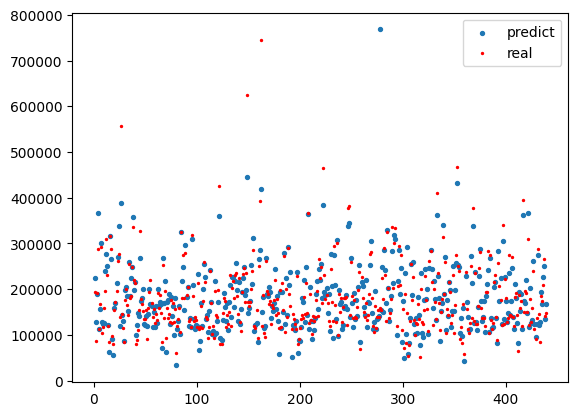

In [11]:
pre_rea_compare_scatter(Lab_pred[2])

OnehotEncoding

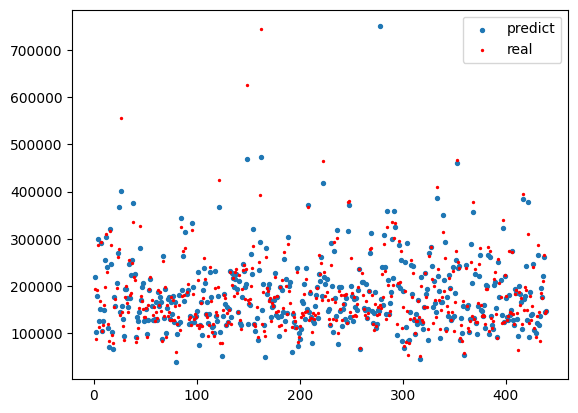

In [12]:
pre_rea_compare_scatter(One_pred[2])

#比較將特徵值進行標準化(label)

In [13]:
def standards_data(scalar,data):
    scalar = scalar
    scalar.fit(data)
    std_data = scalar.transform(data)
    return std_data


MinmaxScalar

linear regresion MSE index 3.5114242840731233e-20
ridge regresion MSE index 241346875.72424823
lasso regresion MSE index 568.3805584169291


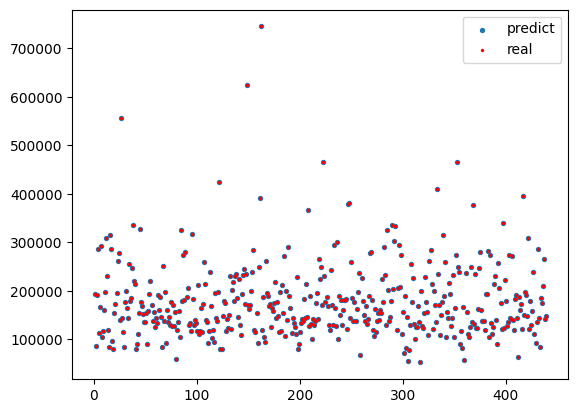

In [14]:
minmax_data = cut_data_np(standards_data( MinMaxScaler(), data_preprocessing_label()),data_preprocessing_label())
minmax_pred = compare_model(minmax_data[0],minmax_data[1],minmax_data[2],minmax_data[3])
eval_target = cut_data_pd(data_preprocessing_label())[3]
pre_rea_compare_scatter(minmax_pred[2])



StandardScalar

linear regresion MSE index 2.185113468714112e-20
ridge regresion MSE index 128079.18225756462
lasso regresion MSE index 446.7939290123177


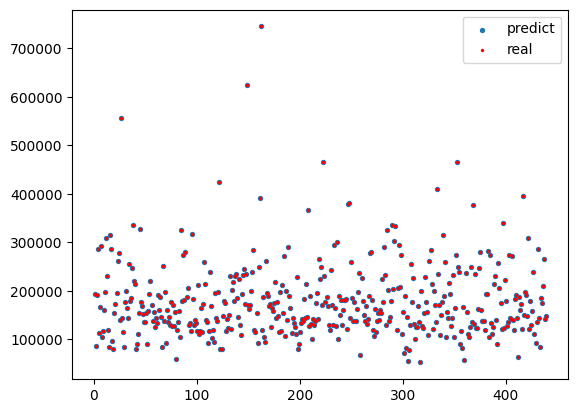

In [15]:
standard_data = cut_data_np(standards_data( StandardScaler(), data_preprocessing_label()),data_preprocessing_label())
standard_pred = compare_model(standard_data[0],standard_data[1],standard_data[2],standard_data[3])
pre_rea_compare_scatter(standard_pred[2])

#比較將特徵值進行標準化(onehot)

MinMaxScalar

linear regresion MSE index 1.2395564410565526e+29
ridge regresion MSE index 1455923754.0422502
lasso regresion MSE index 2775266113.547728


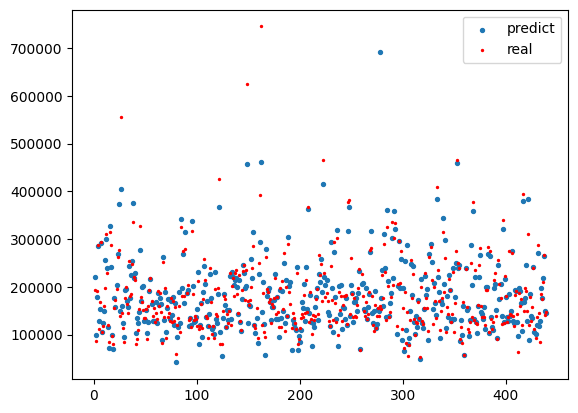

In [16]:
minmax_onehot_data = cut_data_np(standards_data( MinMaxScaler(), data_preprocessing_onehot()[0]),data_preprocessing_label())
minmax_onehot_pred = compare_model(minmax_onehot_data[0],minmax_onehot_data[1],minmax_onehot_data[2],minmax_onehot_data[3],tol = 6.511e+08)
pre_rea_compare_scatter(minmax_onehot_pred[2])

StandardScalar

linear regresion MSE index 1.7913003850483817e+35
ridge regresion MSE index 1648182046.8872986
lasso regresion MSE index 2780828585.243366


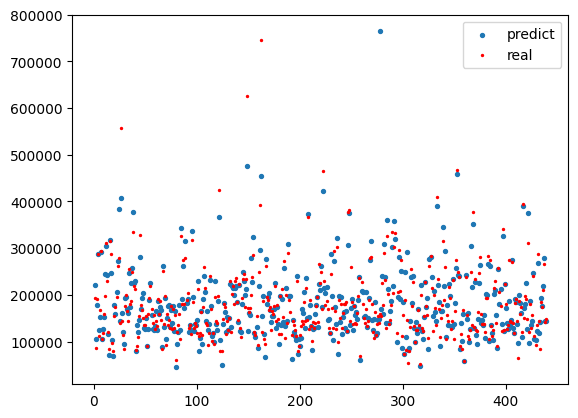

In [17]:
standard_onehot_data = cut_data_np(standards_data( StandardScaler(), data_preprocessing_onehot()[0]),data_preprocessing_label())
standard_onehot_pred = compare_model(standard_onehot_data[0],standard_onehot_data[1],standard_onehot_data[2],standard_onehot_data[3],tol = 6.511e+08)
pre_rea_compare_scatter(standard_onehot_pred[2])

<AxesSubplot:>

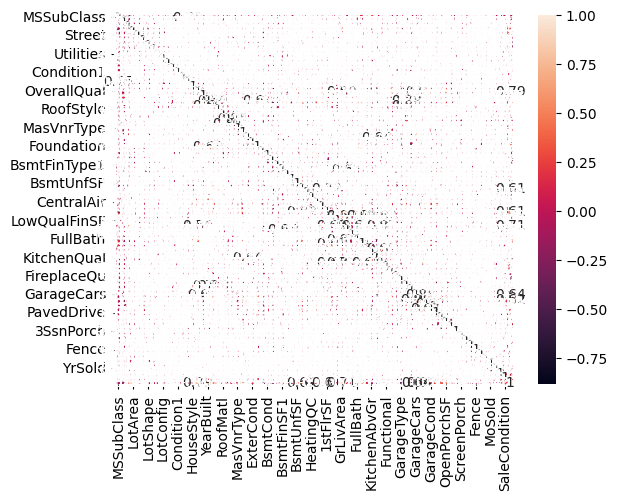

In [18]:
import seaborn as sns

df = data_preprocessing_label()   
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix,annot=True)

In [19]:
corsaleprice = correlation_matrix['SalePrice'].drop(correlation_matrix.index[-1])
corsaleprice.sort_values(inplace=True)

high_cor = list(corsaleprice.index[-4:])
high_cor.append(df.columns[-1])
low_cor = list(corsaleprice.index[:4])
low_cor.append(df.columns[-1])

train_high_cor = cut_data_pd(df[high_cor])
train_low_cor = cut_data_pd(df[low_cor])
train_df = cut_data_pd(df)

print('取前四相關做訓練')
high_cor_pred = compare_model(train_high_cor[0],train_high_cor[1],train_high_cor[2],train_high_cor[3])
print('')
print('取後四相關做訓練')
low_cor_pred = compare_model(train_low_cor[0],train_low_cor[1],train_low_cor[2],train_low_cor[3])

print('')
print('取所有做訓練')
pred = compare_model(train_df[0],train_df[1],train_df[2],train_df[3])

取前四相關做訓練
linear regresion MSE index 1923836730.24853
ridge regresion MSE index 1924141479.1940217
lasso regresion MSE index 1923909354.9387186

取後四相關做訓練
linear regresion MSE index 3041562905.335001
ridge regresion MSE index 3041305866.3544097
lasso regresion MSE index 3041563746.7243505

取所有做訓練
linear regresion MSE index 1880212930.5025697
ridge regresion MSE index 1801283444.4699352
lasso regresion MSE index 1876110009.913976


所有 > 前四> 後四

#繪製GrLivArea ,SalePrice 之散布圖

Text(0.5, 0, 'GrLivArea')

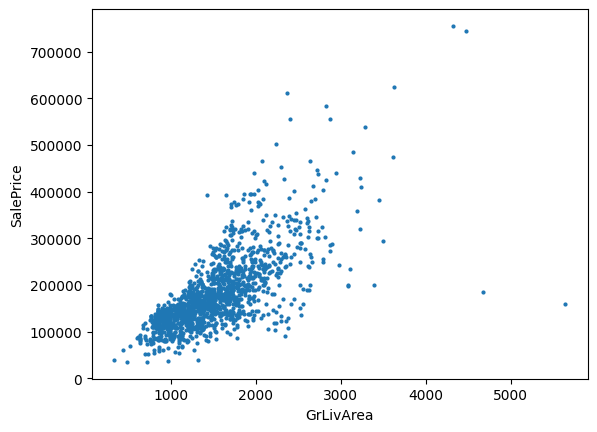

In [20]:
df = data_preprocessing_label()
plt.scatter(df['GrLivArea'],df['SalePrice'],s = 4)
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')

In [21]:
num =len(df)
sort_sale,sort_grv = df['SalePrice'].sort_values(),df['GrLivArea'].sort_values()
def judge_outlier(sort_df):
    q1 = np.mean(sort_df.iloc[365:367])
    q2 = np.mean(sort_df.iloc[730:732])
    q3 = np.mean(sort_df.iloc[1095:1097])
    iqr = q3-q1
    sort_df = sort_df[(sort_df >q2+3*iqr) | (sort_df < q2-3*iqr)]
    return sort_df

去除Outlier後繪圖

Text(0.5, 0, 'GrLivArea')

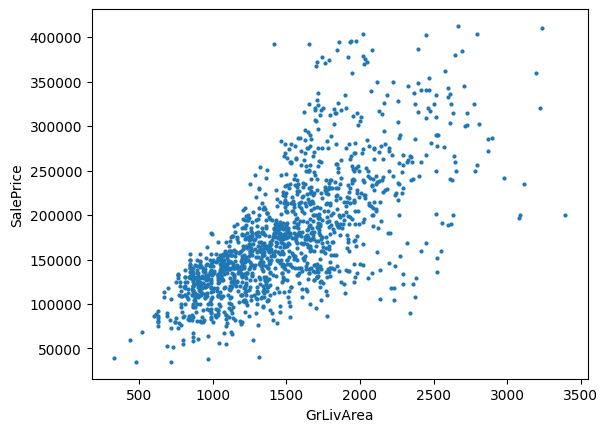

In [22]:
id = judge_outlier(sort_sale).index
id2 = judge_outlier(sort_grv).index
rem_id = list(set(list(id)+list(id2)))
rem_out_SalePrice = df['SalePrice'].drop(list(rem_id))
rem_out_GrLivArea = df['GrLivArea'].drop(list(rem_id))

plt.scatter(rem_out_GrLivArea,rem_out_SalePrice,s = 4)
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')


去除Outlier前後比較

In [23]:
rem_out_df = df.drop(rem_id)
rem_out_cut_df = cut_data_pd(rem_out_df)
cut_df = cut_data_pd(df)
print('去除outlier')
rem_out_pred = compare_model(rem_out_cut_df[0],rem_out_cut_df[1],rem_out_cut_df[2],rem_out_cut_df[3])
print('')
print('沒有去除outlier')
pred = compare_model(cut_df[0],cut_df[1],cut_df[2],cut_df[3])

去除outlier
linear regresion MSE index 481267228.140222
ridge regresion MSE index 488058894.5531137
lasso regresion MSE index 481333335.7523899

沒有去除outlier
linear regresion MSE index 1880212930.5025697
ridge regresion MSE index 1801283444.4699352
lasso regresion MSE index 1876110009.913976


##總結以上，以labelEncoding編碼、以standardScaler標準化、去除outlier，且以Lasso regresion 模型成果最佳

linear regresion MSE index 7.072725109573408e-21
ridge regresion MSE index 52829.22667767498
lasso regresion MSE index 285.3498133261751


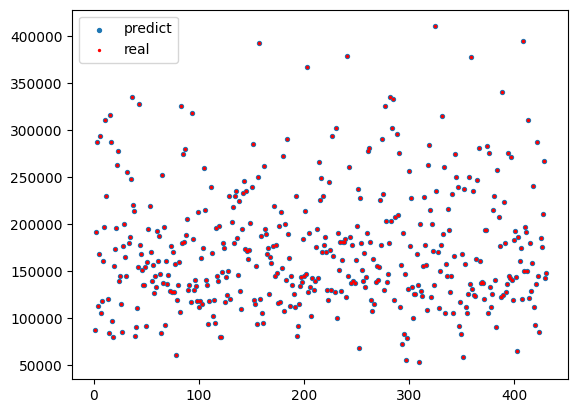

In [24]:
cut_df = cut_data_np(standards_data( StandardScaler(), rem_out_df) ,rem_out_df)
pred = compare_model(cut_df[0],cut_df[1],cut_df[2],cut_df[3])
pre_rea_compare_scatter(pred[2],cut_df[3])